# Obtención de los datos

### Capítulos

Para comenzar, nos traemos un resumen de los capitulos de la serie y lo guardamos como texto.

In [162]:
!pip install bs4

In [163]:
import os
import requests
from bs4 import BeautifulSoup

# Lista de capítulos del 01 al 26
capitulos = [f'{i:02}' for i in range(1, 27)]

# Crear la carpeta 'capitulos' si no existe
os.makedirs('capitulos', exist_ok=True)

# Diccionario para almacenar los resúmenes
resumenes = {}

# Base URL del sitio web
base_url = 'https://evangelion.fandom.com/es/wiki/EP{}'

# Obtener y guardar los resúmenes
for capitulo in capitulos:
    url = base_url.format(capitulo)  # URL para cada capítulo
    response = requests.get(url)

    if response.status_code == 200:
        html = response.text
        print(f"HTML obtenido con éxito para el capítulo {capitulo}")

        soup = BeautifulSoup(html, 'html.parser')

        # Encontrar todos los elementos <p> dentro de la sección de contenido
        content_div = soup.find('div', {'class': 'mw-parser-output'})
        p_tags = content_div.find_all('p') if content_div else []

        # Construir el resumen del capítulo
        resumen = ''
        for tag in p_tags:
            resumen += tag.text.strip() + "\n"

        resumenes[capitulo] = resumen

        # Guardar el resumen en un archivo de texto
        file_path = os.path.join('capitulos', f'EP{capitulo}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(f'Episodio {capitulo} \n')
            file.write(resumen)

        print(f"Resumen del capítulo {capitulo} guardado en {file_path}")

    else:
        print(f"Error al obtener el HTML del capítulo {capitulo}")

"""
print("\nResúmenes guardados:")
for capitulo, resumen in resumenes.items():
    print(f"Capítulo {capitulo}:\n{resumen[:200]}...\n")
"""

HTML obtenido con éxito para el capítulo 01
Resumen del capítulo 01 guardado en capitulos/EP01.txt
HTML obtenido con éxito para el capítulo 02
Resumen del capítulo 02 guardado en capitulos/EP02.txt
HTML obtenido con éxito para el capítulo 03
Resumen del capítulo 03 guardado en capitulos/EP03.txt
HTML obtenido con éxito para el capítulo 04
Resumen del capítulo 04 guardado en capitulos/EP04.txt
HTML obtenido con éxito para el capítulo 05
Resumen del capítulo 05 guardado en capitulos/EP05.txt
HTML obtenido con éxito para el capítulo 06
Resumen del capítulo 06 guardado en capitulos/EP06.txt
HTML obtenido con éxito para el capítulo 07
Resumen del capítulo 07 guardado en capitulos/EP07.txt
HTML obtenido con éxito para el capítulo 08
Resumen del capítulo 08 guardado en capitulos/EP08.txt
HTML obtenido con éxito para el capítulo 09
Resumen del capítulo 09 guardado en capitulos/EP09.txt
HTML obtenido con éxito para el capítulo 10
Resumen del capítulo 10 guardado en capitulos/EP10.txt
HTML obten

'\nprint("\nResúmenes guardados:")\nfor capitulo, resumen in resumenes.items():\n    print(f"Capítulo {capitulo}:\n{resumen[:200]}...\n")\n'

In [164]:

directorio = 'capitulos'

# Iterar sobre los archivos en el directorio
for nombre_archivo in os.listdir(directorio):
    if nombre_archivo.endswith('.txt'):
        # Obtener la ruta completa del archivo
        ruta_archivo = os.path.join(directorio, nombre_archivo)

        # Leer el contenido del archivo
        with open(ruta_archivo, 'r', encoding='utf-8') as f:
            contenido = f.read()

        # Reemplazar saltos de línea vacíos por un solo salto de línea
        contenido_modificado = contenido.replace('\n\n', '\n')

        # Escribir el contenido modificado de nuevo en el archivo
        with open(ruta_archivo, 'w', encoding='utf-8') as f:
            f.write(contenido_modificado)

print('Los saltos de línea vacíos han sido reemplazados en todos los archivos .txt.')


Los saltos de línea vacíos han sido reemplazados en todos los archivos .txt.


#### Juntar todos los textos en uno

In [165]:
import os

# Ruta del directorio que contiene los archivos .txt
directorio = 'capitulos'
# Ruta del archivo de salida
archivo_salida = 'TodosLosCapitulos.txt'

# Abrir el archivo de salida en modo escritura
with open(archivo_salida, 'w', encoding='utf-8') as f_out:
    # Iterar sobre los archivos en el directorio
    for nombre_archivo in os.listdir(directorio):
        if nombre_archivo.endswith('.txt'):
            # Obtener la ruta completa del archivo
            ruta_archivo = os.path.join(directorio, nombre_archivo)
            # Abrir el archivo actual en modo lectura
            with open(ruta_archivo, 'r', encoding='utf-8') as f_in:
                # Escribir el nombre del archivo en el archivo de salida
                f_out.write(f'--- Contenido del episodio {nombre_archivo[2:4]} ---\n')
                # Escribir el contenido del archivo actual
                f_out.write(f_in.read())
                f_out.write('\n\n')  # Añadir un par de líneas en blanco

print(f'Los archivos han sido combinados en {archivo_salida}.')


Los archivos han sido combinados en TodosLosCapitulos.txt.


### Personajes

Hacemos lo mismo con los personajes.

Al intentar hacer un web scrapping sobre diversas fuentes de información, encontré que dichas fuentes siempre contenínan un desorden importante en sus datos y la automatización del proceso de extracción de información particular de los personajes (como su ocupación, personajes con los que se relacionan, etc.) se convirtió en una tarea imposible.

Por tal motivo decidí construir esta planilla en formato de diccionario a mano, buscando información de varios sitios, entre los cuales se encontraron principalmente:
- https://evangelion.fandom.com/es/wiki/Neo_Genesis_Evangelion_Wiki
- https://es.wikipedia.org/wiki/Neon_Genesis_Evangelion
- https://doblaje.fandom.com/es/wiki/Categor%C3%ADa:Personajes_de_Neon_Genesis_Evangelion



In [166]:
# Lista de personajes
personajes = ['Ryoji_Kaji','Keel_Lorenz','Misato_Katsuragi','Gendo_Ikari','Yui_Ikari',
              'Ritsuko_Akagi','Naoko_Akagi','Kozo_Fuyutsuki','Maya_Ibuki',
              'Asuka_Langley_Soryu','Rei_Ayanami','Kaworu_Nagisa','Shinji_Ikari',
              'Toji_Suzuhara','Asuka_Langley_Shikinami','Hikari_Horaki','Sakura_Suzuhara',
              'Midori_Kitakami','Makoto_Hyuga','Mari_Illustrious_Makinami','Rei_Quatre',
              'Shigeru_Aoba','Kyoko_Zeppelin_Soryu']

# Crear la carpeta 'personajes' si no existe
os.makedirs('personajes', exist_ok=True)

base_url = 'https://evangelion.fandom.com/es/wiki/{}'

for personaje in personajes:
    url = base_url.format(personaje)
    response = requests.get(url)

    if response.status_code == 200:
        html = response.text
        print(f"HTML obtenido con éxito para el personaje {personaje}")
        soup = BeautifulSoup(html, 'html.parser')
        content_div = soup.find('div', {'class': 'mw-parser-output'})
        p_tags = content_div.find_all('p') if content_div else []

        resumen = ''
        for tag in p_tags:
            resumen += tag.text.strip() + "\n"

        #dicPersonajes[personaje]['Resumen'] = resumen.replace("\n\n","").replace("\t","").split("\n")
        file_path = os.path.join('personajes', f'{personaje}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(resumen)

        print(f"Resumen del personaje {personaje} guardado en {file_path}")
        nombre = soup.find('h2', {'class': '"pi-item pi-item-spacing pi-title pi-secondary-background"'})

    else:
        print(f"Error al obtener el HTML del capítulo {personaje}")



HTML obtenido con éxito para el personaje Ryoji_Kaji
Resumen del personaje Ryoji_Kaji guardado en personajes/Ryoji_Kaji.txt
HTML obtenido con éxito para el personaje Keel_Lorenz
Resumen del personaje Keel_Lorenz guardado en personajes/Keel_Lorenz.txt
HTML obtenido con éxito para el personaje Misato_Katsuragi
Resumen del personaje Misato_Katsuragi guardado en personajes/Misato_Katsuragi.txt
HTML obtenido con éxito para el personaje Gendo_Ikari
Resumen del personaje Gendo_Ikari guardado en personajes/Gendo_Ikari.txt
HTML obtenido con éxito para el personaje Yui_Ikari
Resumen del personaje Yui_Ikari guardado en personajes/Yui_Ikari.txt
HTML obtenido con éxito para el personaje Ritsuko_Akagi
Resumen del personaje Ritsuko_Akagi guardado en personajes/Ritsuko_Akagi.txt
HTML obtenido con éxito para el personaje Naoko_Akagi
Resumen del personaje Naoko_Akagi guardado en personajes/Naoko_Akagi.txt
HTML obtenido con éxito para el personaje Kozo_Fuyutsuki
Resumen del personaje Kozo_Fuyutsuki guard

In [167]:
def reemplazar_nuevas_lineas(texto):
    import re
    # Reemplaza múltiples saltos de línea por uno solo
    # y agrega un salto adicional si hay líneas separadas
    return re.sub(r'(?<!\n)\n{2,}(?!\n)', '\n\n', texto)

In [168]:
def informacionPersonaje(path):
  """
  La función informacionPersonajes toma un archivo de texto como entrada y devuelve un diccionario con la información del personaje.
  Como sabemos, los archivos de la información scrappeada para los personajes se encuentra en un estado demasiado desordenado
  para que sea de utilidad para la construcción de nodos en una base de datos de grafos. Por ello, esta función
  logra capturar la información más relevante en formato de diccionario (información, afiliación, etc.) y un extra de
  un resumen sobre el personaje.
  """
  informacion = {}
  resumen = ''
  with open(path) as texto:
    cuerpo = texto.read()
    cuerpo = reemplazar_nuevas_lineas(cuerpo.replace('\t',''))
    lista = cuerpo.split('\n\n')

    for elemento in lista:
      if len(elemento) < 1000:

        if len(elemento.split('\n')) == 2:
          titulo, contenido = elemento.split('\n')
          informacion[titulo] = contenido

      else:
        resumen += elemento + '\n'

  informacion['Resumen'] = resumen
  return informacion


Con las siguientes líneas de código almacenamos la información de todos los personajes en una lista que luego será de utilidad para la creación de las bases de datos de grafos.

In [169]:
informacionDeLosPersonajes = {}

for personaje in personajes:
  informacionDeLosPersonajes[personaje.replace('_',' ')] = informacionPersonaje(f'personajes/{personaje}.txt')

### Angeles

In [170]:
# Lista de capítulos del 01 al 26
angeles = ['Adán', 'Lilith','Sachiel','Shamshel',
              'Ramiel','Gaghiel','Israfel','Sandalphon',
              'Matarael','Sahaquiel','Ireul','Leliel',
              'Bardiel','Zeruel','Arael','Armisael','Tabris',
              'Lilin']

# Crear la carpeta 'angeles' si no existe
os.makedirs('angeles', exist_ok=True)

# Diccionario para almacenar los resúmenes
informacionDelAngel = {}

# Base URL del sitio web
base_url = 'https://evangelion.fandom.com/es/wiki/{}'

# Obtener y guardar los resúmenes
for angel in angeles:
    url = base_url.format(angel)  # URL para cada capítulo
    response = requests.get(url)

    if response.status_code == 200:
        html = response.text
        print(f"HTML obtenido con éxito para el angel {angel}")

        soup = BeautifulSoup(html, 'html.parser')

        # Encontrar todos los elementos <p> dentro de la sección de contenido
        content_div = soup.find('div', {'class': 'mw-parser-output'})
        p_tags = content_div.find_all('p') if content_div else []

        # Construir el resumen del capítulo
        resumen = ''
        for tag in p_tags:
            resumen += tag.text.strip() + "\n"

        informacionDelAngel[angel] = resumen

        # Guardar el resumen en un archivo de texto
        file_path = os.path.join('angeles', f'{angel}.txt')
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(f"Nombre del angel: {angel} \n")
            file.write(resumen)

        print(f"Resumen del angel {angel} guardado en {file_path}")

    else:
        print(f"Error al obtener el HTML del capítulo {angel}")

HTML obtenido con éxito para el angel Adán
Resumen del angel Adán guardado en angeles/Adán.txt
HTML obtenido con éxito para el angel Lilith
Resumen del angel Lilith guardado en angeles/Lilith.txt
HTML obtenido con éxito para el angel Sachiel
Resumen del angel Sachiel guardado en angeles/Sachiel.txt
HTML obtenido con éxito para el angel Shamshel
Resumen del angel Shamshel guardado en angeles/Shamshel.txt
HTML obtenido con éxito para el angel Ramiel
Resumen del angel Ramiel guardado en angeles/Ramiel.txt
HTML obtenido con éxito para el angel Gaghiel
Resumen del angel Gaghiel guardado en angeles/Gaghiel.txt
HTML obtenido con éxito para el angel Israfel
Resumen del angel Israfel guardado en angeles/Israfel.txt
HTML obtenido con éxito para el angel Sandalphon
Resumen del angel Sandalphon guardado en angeles/Sandalphon.txt
HTML obtenido con éxito para el angel Matarael
Resumen del angel Matarael guardado en angeles/Matarael.txt
HTML obtenido con éxito para el angel Sahaquiel
Resumen del ange

In [171]:
# Base URL del sitio web
url = 'https://evangelion.fandom.com/es/wiki/%C3%81ngeles'

# Obtener y guardar los resúmenes
response = requests.get(url)

if response.status_code == 200:
    html = response.text
    print(f"HTML obtenido con éxito para la información general de los ángeles")

    soup = BeautifulSoup(html, 'html.parser')

    # Encontrar todos los elementos <p> dentro de la sección de contenido
    content_div = soup.find('div', {'class': 'mw-parser-output'})
    p_tags = content_div.find_all('p') if content_div else []

    # Construir el resumen del capítulo
    resumen = ''
    for tag in p_tags:
        resumen += tag.text.strip() + "\n"

    # Guardar el resumen en un archivo de texto
    file_path = os.path.join('angeles', f'Informacion_General.txt')
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(resumen)

    print(f"Información general de los ángeles guardado en {file_path}")

else:
    print(f"Error al obtener el HTML")

HTML obtenido con éxito para la información general de los ángeles
Información general de los ángeles guardado en angeles/Informacion_General.txt


### Películas

Creo un df con información respectiva a las películas

In [172]:
peliculas = {
    'The End of Evangelion': 'https://es.wikipedia.org/wiki/The_End_of_Evangelion',
    'Rebuild 1': 'https://es.wikipedia.org/wiki/Evangelion:_1.0_You_Are_(Not)_Alone',
    'Rebuild 2': 'https://es.wikipedia.org/wiki/Evangelion:_2.0_You_Can_(Not)_Advance',
    'Rebuild 3': 'https://es.wikipedia.org/wiki/Evangelion:_3.0_You_Can_(Not)_Redo',
    'Rebuild 4': 'https://es.wikipedia.org/wiki/Evangelion:_3.0%2B1.0_Thrice_Upon_a_Time'
}

In [173]:
def obtener_diccionario_pelicula(url):

  response = requests.get(url)

  diccionario = {}

  if response.status_code == 200:
      html = response.text
      print(f"HTML obtenido con éxito para la información general de los periódicos")

      soup = BeautifulSoup(html, 'html.parser')

      content_div = soup.find('table', {'class': 'infobox plainlist plainlinks'})
      p_tags = content_div.find_all('tr') if content_div else []

      for tag in p_tags:
        lista = []
        for elemento in tag:
          lista.append(elemento.text)
        if len(lista) > 1:
          diccionario[lista[0]] = lista[1]

      return diccionario

  else:
      print(f"Error al obtener el HTML")


In [174]:
diccionarios = []
for pelicula, url in peliculas.items():
  diccionarios.append(obtener_diccionario_pelicula(url))

HTML obtenido con éxito para la información general de los periódicos
HTML obtenido con éxito para la información general de los periódicos
HTML obtenido con éxito para la información general de los periódicos
HTML obtenido con éxito para la información general de los periódicos
HTML obtenido con éxito para la información general de los periódicos


In [175]:
import pandas as pd
peliculas = pd.DataFrame(diccionarios)

Limpieza de Recaudación

In [176]:
peliculas['Recaudación'] = peliculas.Recaudación.str.replace(',','.').str.replace('\n','').str.replace('[1]','').str.replace('[2]','')

In [177]:
def divisa(x):
  if '$' in x:
    return 'USD'
  else:
    return 'YEN'

In [178]:
peliculas['Divisa'] = peliculas.Recaudación.apply(lambda x: divisa(x))

In [179]:

peliculas['Recaudación']=peliculas['Recaudación'].str.replace('$','').str.replace('¥','')

In [180]:
peliculas.Recaudación

0     1.450.000.000.00​
1       16.34 millones​
2       41.16 millones​
3        60.5 millones​
4       92.25 millones​
Name: Recaudación, dtype: object

In [181]:
def convertirAFloat(x):
  if 'millones' in x:
    return float(x.replace('millones','').replace('\u200b','')) * 1000000
  else:
    texto = x.replace('\u200b','')
    if texto.endswith('.00'):
      return float(texto[:-3].replace('.',''))
    else:
      return float(texto.replace('.',''))

In [182]:
peliculas['Recaudación']=peliculas.Recaudación.apply(lambda x: convertirAFloat(x))

Limpieza de Dirección

Se necesita una función que separe los nombres cuando se toque una minúscula con una mayúscula.

In [183]:
peliculas.Dirección

0                       \nKazuya TsurumakiHideaki Anno
1               \nHideaki AnnoKazuya TsurumakiMasayuki
2               \nHideaki AnnoKazuya TsurumakiMasayuki
3    \nHideaki AnnoMahiro MaedaKazuya TsurumakiMasa...
4    \nHideaki AnnoMahiro MaedaKatsuichi NakayamaKa...
Name: Dirección, dtype: object

In [184]:
def reemplazar_caracter(texto, indice, nuevo_caracter):
    if 0 <= indice < len(texto):
        texto_lista = list(texto)
        texto_lista[indice] = nuevo_caracter
        return ''.join(texto_lista)

    else:
        return "Índice fuera de rango"

In [185]:
def separarNombres(x):
  import string
  mayusculas = letras_mayusculas = list(string.ascii_uppercase) + ['Ñ']
  minusculas = list(string.ascii_lowercase) + ['ñ']

  texto = x
  for i in range(len(texto)):
    if texto[i] in minusculas and texto[i+1] in mayusculas:
      #texto[i] =
      texto = reemplazar_caracter(texto, i, texto[i] + '-')
  return texto.split('-')

In [186]:
peliculas['Dirección']=peliculas.Dirección.str.replace('\n','').apply(lambda x: separarNombres(x))

Limpieza del resto de los campos

In [187]:
columnas = peliculas.columns

In [188]:
peliculas['Recaudación'].dtype

dtype('float64')

In [189]:
for columna in columnas:
  if peliculas[columna].dtype == 'object':
    peliculas[columna] = peliculas[columna].str.replace('\n','')

In [190]:
for columna in columnas:
  if ('Evangelion' in columna or columna == '') and columna in peliculas.columns:
    peliculas.drop(columna, axis=1, inplace=True)

# Adecuación de los datos

## Datos tabulares

Para los datos tabulares se decidió utilizar dataframes de pandas.

In [191]:
peliculas

,Título,Dirección,Dirección artística,Producción,Guion,Basada en,Música,Sonido,Fotografía,Montaje,...,Género,Duración,Clasificación,Idioma(s),Productora,Distribución,Recaudación,Estudio,Actores de voz,Divisa
0,El Final de Evangelion,NaN,Hiroshi Kato,Mitsuhisa Ishikawa,Hideaki Anno,Neon Genesis Evangelion de Hideaki Anno y Gainax,Shirō Sagisu,Hideyuki Tanaka,Hisao Shirai,Sachiko Miki,...,"Ciencia ficción, filosófico, misterio, mecha, ...",87 minutos,R +16 +13 +18 C +14 +16 M,Japonés,Production I.GGainaxTV Tokyo,Toei CompanyNetflix,1.450000e+09,NaN,NaN,YEN
1,ヱヴァンゲリヲン新劇場版:序(Evangelion Shin Gekijōban: Jo)E...,NaN,NaN,Toshimichi Otsuki,Hideaki Anno,Neon Genesis Evangelion de Hideaki Anno y Yosh...,Shiro Sagisu,NaN,NaN,Hiroshi Okuda,...,"Mecha, Acción, Drama, Ciencia ficción, Psicoló...",98 minutos,NaN,Japonés,Studio Khara,Zima Entertainment20th Century Fox MéxicoSele...,1.634000e+07,Studio Khara,NaN,USD
2,ヱヴァンゲリヲン新劇場版: 破(Evangerion Shin Gekijōban: Ha)...,NaN,NaN,Toshimichi OtsukiHideaki Anno,Hideaki Anno,Neon Genesis Evangelion de Hideaki Anno y Yosh...,Shiro Sagisu,NaN,NaN,NaN,...,"Mecha, Acción, Drama, Ciencia ficción, Psicoló...",108 minutos,NaN,Japonés,Studio Khara,Zima Entertainment20th Century Fox MéxicoSele...,4.116000e+07,Studio Khara,NaN,USD
3,ヱヴァンゲリヲン新劇場版:Q(Evangerion Shin Gekijōban: Kyū)...,NaN,NaN,Hideaki AnnoToshimichi Ohtsuki,Hideaki Anno,"Neon Genesis Evangelion, de Hideaki Anno y Yos...",Shiro Sagisu,NaN,Toru Fukushi,Yeong Mi-Lee,...,AnimaciónMechaAcciónCiencia ficción,96 minutos,NaN,Japonés,Studio Khara,Toei Company y Khara Zima Entertainment20th Ce...,6.050000e+07,Studio Khara,NaN,USD
4,シン・エヴァンゲリオン劇場版:||(Shin Evangelion Gekijōban:||...,NaN,NaN,Takatoshi Okajima,Hideaki Anno,Neon Genesis Evangelion de Hideaki Anno,Shirō Sagisu,NaN,Toru Fukushi,NaN,...,"Mecha, Acción, Drama, Ciencia ficción, Psicoló...",155 minutos,NaN,Japonés,Studio Khara,TohoToei Company (Japón)Metro-Goldwyn-Mayer (I...,9.225000e+07,Studio Khara,23 personasMegumi OgataMegumi HayashibaraYūko ...,USD


## BBDD de grafos

In [192]:
!pip install networkx

In [193]:
import networkx as nx
import matplotlib.pyplot as plt

In [194]:
#G = nx.Graph() #Creo un grafo vacío
G = nx.DiGraph()

In [195]:
# Agregar nodos al grafo desde el diccionario de personajes
G.add_nodes_from(informacionDeLosPersonajes.items())

In [196]:
# Ver los nodos
print("Atributos de los nodos:")
for nodo, atributos in G.nodes(data=True):
    print(f"Nodo: {nodo}, Atributos: {atributos}")

Atributos de los nodos:
Nodo: Ryoji Kaji, Atributos: {'Ryoji Kaji': '加持 リョウジ', 'Edad': '30 años', 'Sexo': 'Masculino', 'Primera aparición': 'Asuka llega a Japón [NGE]  Invitado indeseado [Manga]  Evangelion: 2.0 [RB]', 'Seiyū': 'Kōichi Yamadera', 'Doblador Latino': 'Enrique Cervantes  Gerardo García  Luis Tenorio', 'Doblador en España': 'José Luis Mediavilla', 'Resumen': 'Ryouji Kaji (加持 リョウジ, ,  Kaji Ryōji ?) es un personaje relevante en la franquicia Evangelion.\nKaji parece ser un triple agente, que trabaja como inspector especial para NERV, pero secretamente realiza una investigación detallada sobre la organización, cumpliendo la peligrosa tarea de espía encubierto.\nLa mayor parte del tiempo Kaji es muy tranquilo y jovial, permaneciendo siempre fresco. Él es muy sereno y mantiene su particular sentido del humor, incluso en momentos de crisis. También coquetea descaradamente con sus compañeras de trabajo, actitud que despierta la ira de Misato Katsuragi.\nA pesar de su imagen públi

In [197]:
def obtener_familia(personaje:str):
  # Ejemplo de diccionario de datos
  diccionario_personaje = informacionDeLosPersonajes[personaje]

  # Obtener la familia del diccionario
  familia = diccionario_personaje.get('Familia', '')

  # Separar los miembros de la familia
  miembros_familia = [miembro.strip() for miembro in familia.split(')') if miembro.strip()]

  # Procesar cada miembro de la familia
  for miembro in miembros_familia:
      nombre = miembro.split('(')[0].strip()
      rol = miembro.split('(')[1].strip() if '(' in miembro else 'Familia'

      # Agregar nodo para el miembro de la familia si no existe
      if not G.has_node(nombre):
          G.add_node(nombre, nombre=nombre)

      # Crear relación entre Shinji Ikari y el miembro de la familia
      G.add_edge(personaje, nombre, relacion=rol)


In [198]:
for personaje in personajes:
  obtener_familia(personaje.replace('_',' '))

In [199]:
print("Relaciones:")
#for nodo in G.nodes(data=True):
#    print(f"Nodo: {nodo[0]}, Atributos: {nodo[1]}")
for arista in G.edges(data=True):
    print(f"Relación: {arista[0]} - {arista[1]}, Tipo: {arista[2]['relacion']}")

Relaciones:
Relación: Misato Katsuragi - Dr. Katsuragi, Tipo: padre fallecido
Relación: Misato Katsuragi - Pen Pen, Tipo: mascota
Relación: Misato Katsuragi - Tutora de Shinji Ikari y Asuka Langley Soryu, Tipo: Familia
Relación: Gendo Ikari - Yui Ikari, Tipo: esposa
Relación: Gendo Ikari - Shinji Ikari, Tipo: hijo
Relación: Yui Ikari - Gendo Ikari, Tipo: esposo
Relación: Yui Ikari - Shinji Ikari, Tipo: hijo
Relación: Ritsuko Akagi - Naoko Akagi, Tipo: madre fallecida
Relación: Naoko Akagi - Ritsuko Akagi, Tipo: hija
Relación: Asuka Langley Soryu - Kyoko Zeppelin Soryu, Tipo: madre fallecida
Relación: Asuka Langley Soryu - Madrastra en Alemania, Tipo: Familia
Relación: Rei Ayanami - Ninguna, Tipo: Familia
Relación: Shinji Ikari - Gendo Ikari, Tipo: Padre
Relación: Shinji Ikari - Yui Ikari, Tipo: Madre
Relación: Toji Suzuhara - Sakura Suzuhara, Tipo: hermana pequeña
Relación: Hikari Horaki - Nozomi Horaki, Tipo: hermana menor
Relación: Hikari Horaki - Kodama Horaki, Tipo: hermana mayor
R

In [200]:
#Almaceno las relaciones en un diccionario para posteriormente graficarlas
edge_labels = {}
for u, v, data in G.edges(data=True):
        print(f"- {u} <- {v}: {data}")
        edge_labels[(u, v)] = data['relacion']

- Misato Katsuragi <- Dr. Katsuragi: {'relacion': 'padre fallecido'}
- Misato Katsuragi <- Pen Pen: {'relacion': 'mascota'}
- Misato Katsuragi <- Tutora de Shinji Ikari y Asuka Langley Soryu: {'relacion': 'Familia'}
- Gendo Ikari <- Yui Ikari: {'relacion': 'esposa'}
- Gendo Ikari <- Shinji Ikari: {'relacion': 'hijo'}
- Yui Ikari <- Gendo Ikari: {'relacion': 'esposo'}
- Yui Ikari <- Shinji Ikari: {'relacion': 'hijo'}
- Ritsuko Akagi <- Naoko Akagi: {'relacion': 'madre fallecida'}
- Naoko Akagi <- Ritsuko Akagi: {'relacion': 'hija'}
- Asuka Langley Soryu <- Kyoko Zeppelin Soryu: {'relacion': 'madre fallecida'}
- Asuka Langley Soryu <- Madrastra en Alemania: {'relacion': 'Familia'}
- Rei Ayanami <- Ninguna: {'relacion': 'Familia'}
- Shinji Ikari <- Gendo Ikari: {'relacion': 'Padre'}
- Shinji Ikari <- Yui Ikari: {'relacion': 'Madre'}
- Toji Suzuhara <- Sakura Suzuhara: {'relacion': 'hermana pequeña'}
- Hikari Horaki <- Nozomi Horaki: {'relacion': 'hermana menor'}
- Hikari Horaki <- Kodama 

### Gráfico de la base de datos de nodos

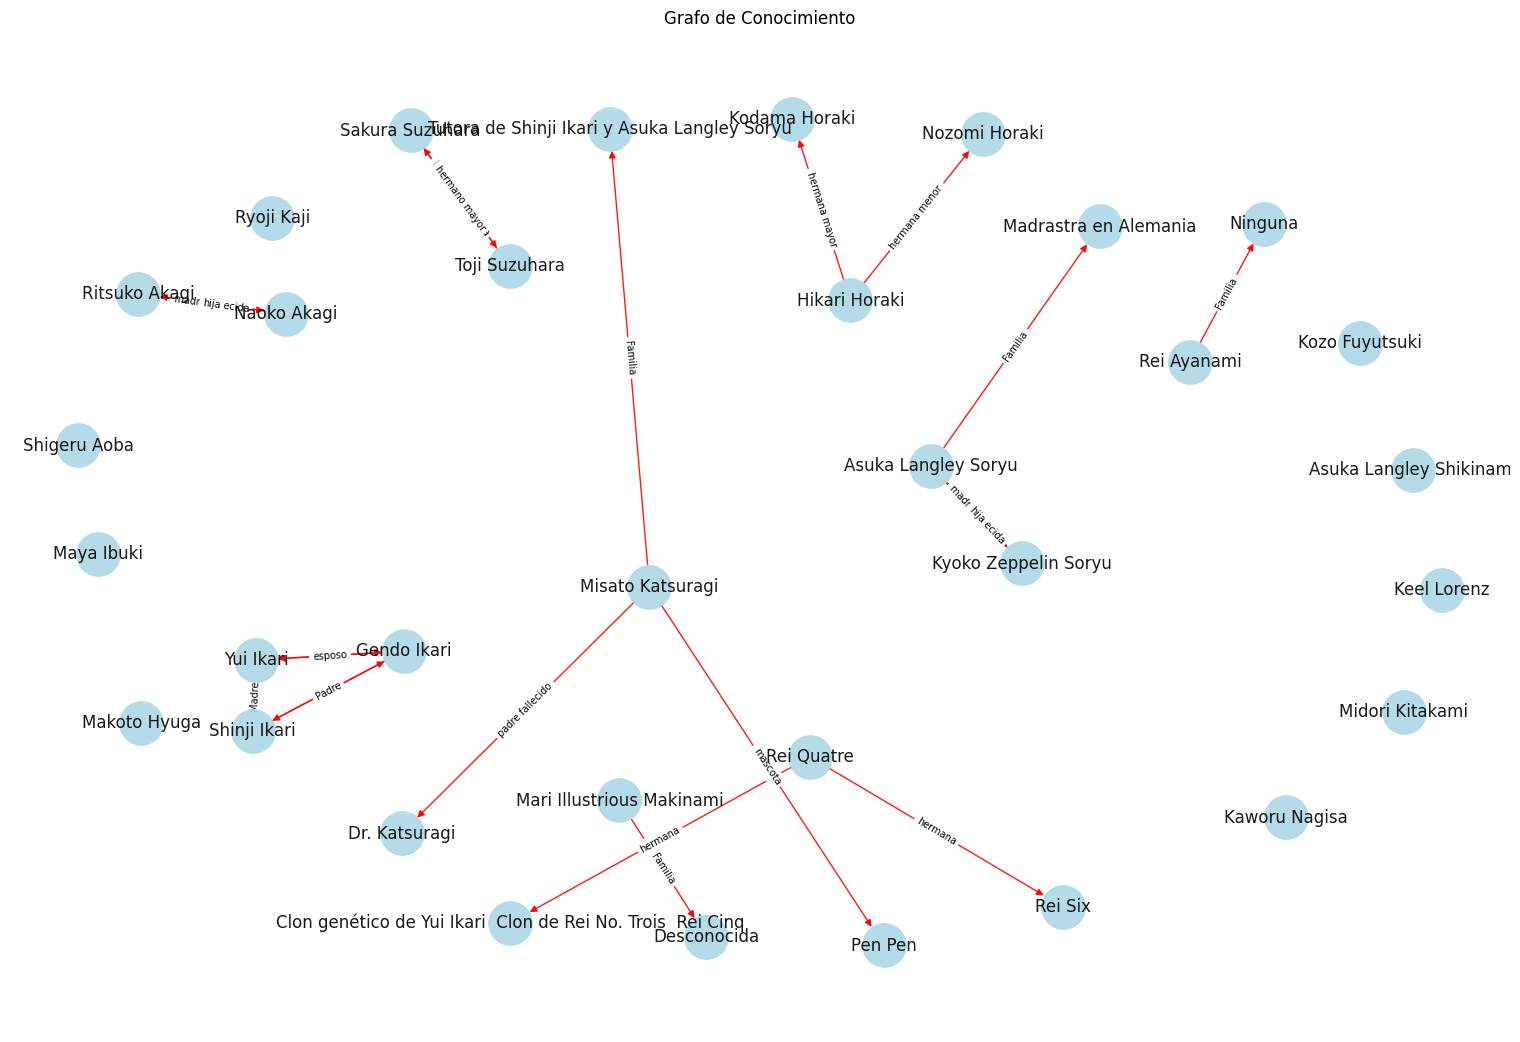

In [201]:
plt.figure(figsize=(15, 10))
# Aumentar el espacio entre nodos
pos = nx.spring_layout(G, k=0.5)

nx.draw(G, pos, edge_color='red', width=1.0, linewidths=0.5,
        node_size=1000, node_color='lightblue', alpha=0.9,
        labels={node: node for node in G.nodes()})
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.title('Grafo de Conocimiento')
plt.axis('off')
plt.show()

A continuación se añadirán algunos atributos a nodos ya creados

In [202]:
# Añadir más atributos a nodos ya creados
G.nodes['Ryoji Kaji']['ocupacion']='Agente de Nerv'
G.nodes['Ryoji Kaji']['trivia']='Fumador empedernido'
G.nodes['Keel Lorenz']['ocupacion']='Miembro de SEELE'
G.nodes['Keel Lorenz']['trivia']='Líder de SEELE'
G.nodes['Misato Katsuragi']['ocupacion']='Oficial de Operaciones de Nerv'
G.nodes['Misato Katsuragi']['trivia']='Le gusta la cerveza'
G.nodes['Gendo Ikari']['ocupacion']='Comandante de Nerv'
G.nodes['Gendo Ikari']['trivia']='Obsesionado con el Proyecto de Instrumentalización'
G.nodes['Yui Ikari']['ocupacion']='Investigadora en Nerv'
G.nodes['Yui Ikari']['trivia']='Madre de Shinji'
G.nodes['Ritsuko Akagi']['ocupacion']='Científica en Nerv'
G.nodes['Ritsuko Akagi']['trivia']='Hija de Naoko Akagi'
G.nodes['Naoko Akagi']['ocupacion']='Científica en Nerv'
G.nodes['Naoko Akagi']['trivia']='Desarrolladora del programa MAGI'
G.nodes['Kozo Fuyutsuki']['ocupacion']='Vicecomandante de Nerv'
G.nodes['Kozo Fuyutsuki']['trivia']='Confidente de Gendo'
G.nodes['Maya Ibuki']['ocupacion']='Operadora de la computadora MAGI'
G.nodes['Maya Ibuki']['trivia']='Gran aficionada a los ordenadores'
G.nodes['Asuka Langley Soryu']['ocupacion']='Piloto del EVA-02'
G.nodes['Asuka Langley Soryu']['trivia']='De origen alemán-japonés'
G.nodes['Rei Ayanami']['ocupacion']='Piloto del EVA-00'
G.nodes['Rei Ayanami']['trivia']='Primera niña sustituta'
G.nodes['Kaworu Nagisa']['ocupacion']='Último Ángel'
G.nodes['Kaworu Nagisa']['trivia']='Piloto del EVA-13 en Rebuild'
G.nodes['Shinji Ikari']['ocupacion']='Piloto del EVA-01'
G.nodes['Shinji Ikari']['trivia']='Hijo de Gendo e Yui Ikari'
G.nodes['Toji Suzuhara']['ocupacion']='Piloto temporal del EVA-03'
G.nodes['Toji Suzuhara']['trivia']='Amigo de Shinji'
G.nodes['Asuka Langley Shikinami']['ocupacion']='Piloto del EVA-02 en Rebuild'
G.nodes['Asuka Langley Shikinami']['trivia']='Reemplazo de Asuka Langley Soryu'
G.nodes['Hikari Horaki']['ocupacion']='Estudiante de la escuela secundaria'
G.nodes['Hikari Horaki']['trivia']='Amiga de Toji y Asuka'
G.nodes['Sakura Suzuhara']['ocupacion']='Madre de Toji Suzuhara'
G.nodes['Sakura Suzuhara']['trivia']='Nunca aparece en la serie'
G.nodes['Midori Kitakami']['ocupacion']='Miembro de SEELE'
G.nodes['Midori Kitakami']['trivia']='Miembro secundario de SEELE'
G.nodes['Makoto Hyuga']['ocupacion']='Operador de Nerv'
G.nodes['Makoto Hyuga']['trivia']='Leal a Misato Katsuragi'
G.nodes['Mari Illustrious Makinami']['ocupacion']='Piloto del EVA-05 en Rebuild'
G.nodes['Mari Illustrious Makinami']['trivia']='Extrovertida y enérgica'
G.nodes['Rei Quatre']['ocupacion']='Versión alternativa de Rei Ayanami'
G.nodes['Rei Quatre']['trivia']='Aparece en el manga "Neon Genesis Evangelion: ANIMA"'
G.nodes['Shigeru Aoba']['ocupacion']='Operador de Nerv'
G.nodes['Shigeru Aoba']['trivia']='Vigilante y leal'
G.nodes['Kyoko Zeppelin Soryu']['ocupacion']='Madre de Asuka Langley Soryu'
G.nodes['Kyoko Zeppelin Soryu']['trivia']='Desarrollo del EVA Series'

# Mostrar los atributos de los nodos
print("Atributos de los nodos:")
for node, data in G.nodes(data=True):
    print(f"- {node}: {data.keys()}")


Atributos de los nodos:
- Ryoji Kaji: dict_keys(['Ryoji Kaji', 'Edad', 'Sexo', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Doblador en España', 'Resumen', 'ocupacion', 'trivia'])
- Keel Lorenz: dict_keys(['Keel Lorenz', 'Afiliación', 'Edad', 'Sexo', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Resumen', 'ocupacion', 'trivia'])
- Misato Katsuragi: dict_keys(['Misato Katsuragi', 'Edad', 'Sexo', 'Familia', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Doblador en España', 'Resumen', 'ocupacion', 'trivia'])
- Gendo Ikari: dict_keys(['Gendo Ikari', 'Edad', 'Sexo', 'Familia', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Doblador en España', 'Resumen', 'ocupacion', 'trivia'])
- Yui Ikari: dict_keys(['Yui Ayanami', 'Edad', 'Sexo', 'Familia', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Doblador en España', 'Resumen', 'ocupacion', 'trivia'])
- Ritsuko Akagi: dict_keys(['Ritsuko Akagi', 'Edad', 'Sexo', 'Familia', 'Primera aparición', 'Seiyū', 'Doblador Latino', 'Doblador

# Preparación de funciones necesarias para la ejecución final

## Funciones para embeddings

In [203]:
!pip install llama-index-embeddings-huggingface==0.1.1 sentence-transformers==2.3.1 pypdf==4.0.1 langchain==0.1.7 python-decouple==3.8 llm-templates llama-index-readers-file

In [204]:
from langchain.text_splitter import RecursiveCharacterTextSplitter #Separar texto en chunks
from sentence_transformers import SentenceTransformer, util #realizar embeddings

from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader #Leer directorios y generar indices
from decouple import config
from llama_index.core import Settings
from google.colab import userdata
from llm_templates import Formatter, Conversation
from typing import Union

In [205]:
def cargarModeloEmeddings():
  """
  Carga el modelo que se utilizará para los embeddings,
  en este caso es distiluse-base-multilingual-cased-v1
  """
  modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')
  return modelo

In [206]:
def obtenerEmbeddings(oraciones:list, model_embed):
  """
  Recibe una lista de oraciones o frases de un texto, y con la utilización de un modelo de embeddings genera los embeddings necesarios.
  """
  embeddings = model_embed.encode(oraciones, convert_to_tensor=True)
  return embeddings

In [207]:
def contextoMasSimilar(embdeddings,modelo, query: str, topn: int = 1):
  """
  Obtiene las topn embdeddings más similares utilizando una comparación
  de coseno de los embeddings de las embdeddings y la consulta realizada.
  """

  #Realizo el embedding de la consulta
  consulta = modelo.encode(query, convert_to_tensor=True)

  #Obtengo las puntuaciones de los distintos chunks
  puntuaciones_coseno= util.cos_sim(consulta, embeddings)

  #Creo un diccionario {puntuacion: indice}
  puntuaciones = {}
  for indice, tensor in enumerate(puntuaciones_coseno[0]):
    puntuaciones[tensor.item()]=indice

  listaPuntuaciones = list(puntuaciones.keys())

  #Ordeno las puntuaciones de mayor a menor
  listaPuntuaciones.sort(reverse = True)

  #Obtengo las topn mejores puntuaciones
  mejoresPuntuaciones = listaPuntuaciones[0:topn]

  #Guardo en resultados las topn mejores oraciones
  resultados = []
  for puntuacion in mejoresPuntuaciones:
    indice = puntuaciones[puntuacion]
    resultados.append(oraciones[indice])

  return resultados

In [223]:
def generarChunks(contenido_del_texto_o_directorio:str, directorio = True, tamañoChunk:int=500, chunkOverlap:int=20)->list:
  """
  Esta función toma por defecto el nomrbe de un directorio, obtiene los textos de los archivos en él y devuelve los chunks divididos.
  Si se desea pasar un texto almacenado en una variable, setear directorio = False.
  """
  if directorio:
    documents = SimpleDirectoryReader(input_dir=contenido_del_texto_o_directorio).load_data()
    #texto = documents[0].text
    #text_splitter = RecursiveCharacterTextSplitter(chunk_size=tamañoChunk, chunk_overlap=chunkOverlap)
    #chunks = text_splitter.split_text(texto)

    nuevaLista = []
    for documento in documents:
      text_splitter = RecursiveCharacterTextSplitter(chunk_size=tamañoChunk, chunk_overlap=chunkOverlap)
      chunks = text_splitter.split_text(documento.text)
      nuevaLista.append(chunks)

    return nuevaLista

  else:
    documents = contenido_del_texto_o_directorio.replace('\t','').replace('\n','')
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=tamañoChunk, chunk_overlap=chunkOverlap)
    chunks = text_splitter.split_text(documents)
    return chunks

### Ejemplo de uso con directorios

In [209]:
modelo = cargarModeloEmeddings()
listaDeChunksCapitulos = generarChunks('capitulos', tamañoChunk=1000, chunkOverlap=20)

In [210]:
len(listaDeChunksCapitulos) #26 capitulos

26

In [211]:
#Este codigo genera un vector POR CAPÍTULO
embeddingsCapitulos = obtenerEmbeddings(listaDeChunksCapitulos, modelo)

In [212]:
len(embeddingsCapitulos)

26

In [213]:
#Este codigo genera un vector para cada CHUNK del capitulo 1
embeddingsCapitulo1 = obtenerEmbeddings(listaDeChunksCapitulos[0], modelo)

In [214]:
embeddingsCapitulo1

tensor([[-0.0647, -0.0184, -0.0007,  ...,  0.0030, -0.0304,  0.0569],
        [-0.0503,  0.0076, -0.0545,  ...,  0.0123,  0.0231,  0.0016],
        [-0.0176,  0.0149, -0.0403,  ..., -0.0088,  0.0417,  0.0007],
        [-0.0819,  0.0148, -0.0277,  ...,  0.0478, -0.0263, -0.0226],
        [-0.0391,  0.0150, -0.0424,  ...,  0.0072, -0.0390,  0.0135],
        [-0.0123,  0.0419, -0.0283,  ...,  0.0030, -0.0485, -0.0449]])

In [215]:
chunksTotalesCapitulos = []

#Almaceno todas las o
for capitulo in listaDeChunksCapitulos:
  for chunk in capitulo:
    chunksTotalesCapitulos.append(chunk)

In [216]:
embdingsTodosLosCapitulos = obtenerEmbeddings(chunksTotalesCapitulos, modelo)

In [217]:
#Embeddings todos juntos (sin separar por capitulo)
embdingsTodosLosCapitulos

tensor([[-0.0647, -0.0184, -0.0007,  ...,  0.0030, -0.0304,  0.0569],
        [-0.0503,  0.0076, -0.0545,  ...,  0.0123,  0.0231,  0.0016],
        [-0.0176,  0.0149, -0.0403,  ..., -0.0088,  0.0417,  0.0007],
        ...,
        [-0.0146, -0.0052, -0.0630,  ..., -0.0054,  0.0090,  0.0056],
        [ 0.0142, -0.0091, -0.0091,  ..., -0.0026,  0.0012, -0.0393],
        [ 0.0046,  0.0523, -0.0398,  ...,  0.0150,  0.0333, -0.0117]])

------------

In [218]:
listaDeChunksAngeles = generarChunks('angeles', tamañoChunk=700, chunkOverlap=20)

In [219]:
len(listaDeChunksAngeles) #19 angeles

19

### Ejemplo de uso con texto

In [224]:
listaDeChunksPersonajes = []
for personaje in informacionDeLosPersonajes.keys():
  listaDeChunksPersonajes.append(generarChunks(informacionDeLosPersonajes[personaje]['Resumen'], directorio=False))

In [225]:
listaDeChunksPersonajes[0][:5] #Primeros 5 chunks del primer personaje

['Ryouji Kaji (加持 リョウジ, ,  Kaji Ryōji ?) es un personaje relevante en la franquicia Evangelion.Kaji parece ser un triple agente, que trabaja como inspector especial para NERV, pero secretamente realiza una investigación detallada sobre la organización, cumpliendo la peligrosa tarea de espía encubierto.La mayor parte del tiempo Kaji es muy tranquilo y jovial, permaneciendo siempre fresco. Él es muy sereno y mantiene su particular sentido del humor, incluso en momentos de crisis. También coquetea',
 'También coquetea descaradamente con sus compañeras de trabajo, actitud que despierta la ira de Misato Katsuragi.A pesar de su imagen pública irresponsable, Kaji demuestra un gran nivel de responsabilidad personal y una gran sabiduría en lo referente al mundo y las interacciones personales de los demás.Él actúa como una figura paterna para Asuka y Shinji, especialmente para este último. Asuka dice estar enamorada de él; sin embargo, Kaji la evita fríamente y en repetidas ocasiones rechaza sus

In [226]:
embeddings = obtenerEmbeddings(listaDeChunksPersonajes[0][:5], modelo)

In [227]:
embeddings

tensor([[-0.0353, -0.0238, -0.0218,  ...,  0.0085, -0.0820, -0.0052],
        [ 0.0208, -0.0735, -0.0297,  ..., -0.0049, -0.0521, -0.0043],
        [-0.0333, -0.0036, -0.0445,  ...,  0.0335, -0.0250,  0.0457],
        [-0.0626,  0.0450, -0.0157,  ..., -0.0138, -0.0096,  0.0393],
        [-0.0191, -0.0029,  0.0581,  ...,  0.0343, -0.0226, -0.0010]])

## Base de datos vectorial

In [228]:
!pip install chromadb

In [230]:
# import chromadb and create client
import chromadb

client = chromadb.Client()
collection = client.create_collection("my-vector_database5")

### Agregar los chunks de los capítulos a la base de datos vectorial

A continuación se crean las listas para insertar los chunks dentro de la base de datos vectorial

In [231]:
#Obtengo lista de capitulos

listaDeChunksCapitulos = generarChunks('capitulos', tamañoChunk=2000, chunkOverlap=20)
fuenteCapitulos = []

chunksTotalesCapitulos = []
for capitulo in listaDeChunksCapitulos:
  for chunk in capitulo:
    chunksTotalesCapitulos.append(chunk)
    fuenteCapitulos.append('capitulo')

In [232]:
#Obtengo lista de embeddings
embdingsTodosLosCapitulos = obtenerEmbeddings(chunksTotalesCapitulos, modelo)

In [233]:
# Calcular embeddings para los documentos
embeddings = embdingsTodosLosCapitulos.cpu().numpy().tolist()

In [234]:
indiceUltimo = 0
for i, chunk in enumerate(chunksTotalesCapitulos):
  collection.add(
      documents=[chunk],
      metadatas=[{"categoria": "capitulo"}],
      ids=["id"+str(i)],
      embeddings=embeddings[i]
  )
  indiceUltimo = i

### Agregar los chunks de los angeles a la base de datos vectorial

In [235]:
listaDeChunksAngeles = generarChunks('angeles', tamañoChunk=2000, chunkOverlap=20)
fuenteAngeles = []
chunksTotalesAngeles = []

for angel in listaDeChunksAngeles:
  for chunk in angel:
    chunksTotalesAngeles.append(chunk)
    fuenteAngeles.append('angeles')

In [236]:
embedingsTodosLosAngeles = obtenerEmbeddings(chunksTotalesAngeles, modelo)

In [237]:
embeddings = embedingsTodosLosAngeles.cpu().numpy().tolist()

In [238]:
len(embeddings)

89

In [239]:
for i, chunk in enumerate(chunksTotalesAngeles):
  indice = i+indiceUltimo+1
  collection.add(
      documents=[chunk],
      metadatas=[{"categoria": "angeles"}],
      ids=["id"+str(indice)],
      embeddings = embeddings[i]
  )

### Agregar los chunks del dataframe de películas a la bbdd vectorial

In [273]:
filasPeliculas = []

for i in range(peliculas.shape[0]):
  filasPeliculas.append(list(peliculas.iloc[i].values))

In [284]:
listaPeliculas = []
for i in range(len(filasPeliculas)):
  listaPeliculas.append(str(filasPeliculas[i]))

In [286]:
embeddingsPeliculas = obtenerEmbeddings(listaPeliculas, modelo)

In [288]:
embeddings = embeddingsPeliculas.cpu().numpy().tolist()

In [289]:
for i, chunk in enumerate(listaPeliculas):
  indice = i+indiceUltimo+1
  collection.add(
      documents=[chunk],
      metadatas=[{"categoria": "películas"}],
      ids=["peliculaId"+str(indice)],
      embeddings = embeddings[i]
  )

### Realizar la consulta

In [294]:
def obtenerContextosMasSimilares(query: str, topn: int = 3):
  embedding_consulta = obtenerEmbeddings([query], modelo).cpu().numpy().tolist()

  results = collection.query(
    query_embeddings=embedding_consulta,  # Aquí pasamos el embedding de la consulta
    n_results=topn  # Traemos los 3 resultados más cercanos
  )

  #contextos = []
  #distancias = []
  diccionario = {}
  for i in range(topn):
    contexto = results['documents'][0][i]
    categoria = results['metadatas'][0][i]['categoria']
    distancia = results['distances'][0][i]
    diccionario[distancia] = [contexto, categoria]
    #contextos.append(contexto)
    #distancias.append(distancia)
  return diccionario

## Preparado del modelo

In [242]:
!pip install llama-index-embeddings-huggingface==0.1.1 sentence-transformers==2.3.1 pypdf==4.0.1 langchain==0.1.7 python-decouple==3.8 llm-templates llama-index-readers-file

In [243]:
!pip install torch

In [244]:

def zephyr_chat_template(messages, add_generation_prompt=True):
    formatter = Formatter()
    conversation = Conversation(model='zephyr', messages=messages)
    # Renderizar la plantilla con los mensajes proporcionados
    return formatter.render(conversation, add_assistant_prompt=add_generation_prompt)

def generate_answer(prompt: str, max_new_tokens: int = 768) -> None:
    try:
        api_key = config('HUGGINGFACE_TOKEN', userdata.get('HUGGINGFACE_TOKEN'))

        api_url = "https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta"

        headers = {"Authorization": f"Bearer {api_key}"}
        data = {
            "inputs": prompt,
            "parameters": {
                "max_new_tokens": max_new_tokens,
                "temperature": 0.7,
                "top_k": 50,
                "top_p": 0.95
            }
        }
        response = requests.post(api_url, headers=headers, json=data)
        respuesta = response.json()[0]["generated_text"][len(prompt):]
        return respuesta

    except Exception as e:
        print(f"An error occurred: {e}")

def prepare_prompt(query_str: str, context_str: str):
  TEXT_QA_PROMPT_TMPL = (
      "La información de contexto es la siguiente:\n"
      "---------------------\n"
      "{context_str}\n"
      "---------------------\n"
      "Dada la información de contexto anterior, y sin utilizar conocimiento previo, responde la siguiente pregunta.\n"
      "Pregunta: {query_str}\n"
      "Respuesta: "
  )

  messages = [
      {
          "role": "system",
          "content": "Eres un asistente útil que siempre responde con respuestas veraces, útiles y basadas en hechos.",
      },
      {"role": "user", "content": TEXT_QA_PROMPT_TMPL.format(context_str=context_str, query_str=query_str)},
  ]

  final_prompt = zephyr_chat_template(messages)
  return final_prompt

In [245]:
def responder(query:str, contexto:str):
  final_prompt = prepare_prompt(query, contexto)
  return generate_answer(final_prompt)

otras pruebas

## Clasificador basado en regresión logística

In [246]:
!pip install transformers sentence_transformers

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#import nltk
from transformers import BertTokenizer, BertModel
#import torch
import numpy as np
from sentence_transformers import SentenceTransformer

# Cargamos el modelo desde HuggingFace https://huggingface.co/sentence-transformers/all-mpnet-base-v2 para hacer los embeddings
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [248]:

labels = [(0, "Películas"), (1, "Personajes"), (2, "Capítulos o ángles")]

dataset = []
# textos de "peliculas"
dataset.append((0, "¿Cuánto recaudó la película Rebuild of Evangelion?"))
dataset.append((0, "¿Cuánto recaudó la última película?"))
dataset.append((0, "Las adaptaciones al cine de Evangelion son 4: 1.0, 2.0, 3.0 y 3.0+1.0"))
dataset.append((0, "El idioma de las películas es japonés"))
dataset.append((0, "El genero de la cuarta película es Mecha, Acción, Drama, Ciencia ficción"))
dataset.append((0,"¿Cuál es el título completo de la primera película de la tetralogía 'Rebuild of Evangelion'?"))
dataset.append((0,"¿Quién fue el director de la película 'The End of Evangelion'?"))
dataset.append((0,"¿En qué año se estrenó la película 'Evangelion: 2.0 You Can (Not) Advance'?"))
dataset.append((0,"¿Cuál es la duración aproximada de la película 'Evangelion: 3.0+1.0 Thrice Upon a Time'?"))
dataset.append((0,"¿Cuánto fue el presupuesto estimado para la producción de 'Evangelion: 3.0 You Can (Not) Redo'?"))
dataset.append((0,"¿Cuál fue la recepción crítica de la película 'Evangelion: 1.0 You Are (Not) Alone'?"))
dataset.append((0,"¿Quiénes fueron los compositores de la música de la serie de películas 'Rebuild of Evangelion'?"))
dataset.append((0,"¿Cuál es el orden cronológico de las películas en la serie 'Rebuild of Evangelion'?"))
dataset.append((0,"¿Cuántas adaptaciones cinematográficas ha tenido la serie 'Neon Genesis Evangelion' en total?"))
dataset.append((0,"¿Dónde se realizó el estreno mundial de la película 'Evangelion: 3.0+1.0 Thrice Upon a Time'?"))

# textos de "personajes"
dataset.append((1, "¿Quiéne es Shinji Ikari"))
dataset.append((1, "Quién es el protagonista del anime Evangelion"))
dataset.append((1, "Dime la edad de Gendo"))
dataset.append((1, "Dime la ocupación de Ritsuko"))
dataset.append((1, "Dime la relación entre Rei y Gendo"))
dataset.append((1, "Cuántos años tiene Asuka?"))
dataset.append((1, "Cuál es la ocupación de Gendo Ikari?"))
dataset.append((1, "Cuál es la relación entre Rei Ayanami y Shinji Ikari?"))
dataset.append((1,"¿Cuál es el origen del nombre 'Shinji Ikari'?"))
dataset.append((1,"¿Cuáles son los principales conflictos emocionales de Asuka Langley Soryu en la serie?"))
dataset.append((1,"¿Qué relación tiene Misato Katsuragi con Ryoji Kaji?"))
dataset.append((1,"¿Cuál es la historia de fondo de Kaworu Nagisa y su relación con SEELE?"))
dataset.append((1,"¿Cómo se desarrolla la relación entre Rei Ayanami y Shinji Ikari a lo largo de la serie?"))
dataset.append((1,"¿Qué traumas psicológicos experimenta Shinji Ikari y cómo afectan su desarrollo?"))
dataset.append((1,"¿Cuál es el papel de Mari Makinami Illustrious en las películas 'Rebuild of Evangelion'?"))
dataset.append((1,"¿Qué motivaciones tienen los Ángeles en su conflicto con NERV y la humanidad?"))
dataset.append((1,"¿Cuál es el destino final de Ritsuko Akagi en la serie?"))
dataset.append((1,"¿Qué simboliza el Evangelion Unit-01 en términos de la trama y la mitología de la serie?"))

# textos de "capítulos o ánglees"
dataset.append((2, "¿Qué sucede en el capítulo 1?"))
dataset.append((2, "¿Cuál es el primer ángel que aparece en la serie?"))
dataset.append((2, "¿Qué son los ángeles?"))
dataset.append((2, "¿Cuál fue el último ángel que aparece en la serie?"))
dataset.append((2, "Qué sucede en el capítulo 9?"))
dataset.append((2, "¿Cómo termina la serie?"))
dataset.append((2, "¿En qué año ocurre la serie?"))
dataset.append((2, "¿Quién recoge a Shinji en el primer episodio?"))
dataset.append((2, "¿Por qué Kaworu le dice a Rei 'tu eres igual que yo' en el final?"))
dataset.append((2, "¿Qué criatura estaba en el dogma central, Adam o Lilith?"))
dataset.append((2,"¿Cuál es el título del primer episodio de la serie 'Neon Genesis Evangelion' y qué eventos importantes ocurren en él?"))
dataset.append((2,"¿Cuál es el primer Ángel que aparece en la serie y cómo se desarrolla el enfrentamiento con él?"))
dataset.append((2,"¿Qué se sabe sobre la naturaleza de los Ángeles y cuál es su propósito en la serie?"))
dataset.append((2,"¿Cuál es el último Ángel que aparece en la serie y cómo afecta el desarrollo de la trama?"))
dataset.append((2,"¿Qué eventos significativos ocurren en el noveno episodio de la serie?"))
dataset.append((2,"¿Cómo concluye la serie 'Neon Genesis Evangelion' y cuáles son las principales interpretaciones de su final?"))
dataset.append((2,"¿En qué año se ambienta la serie 'Neon Genesis Evangelion' y cómo afecta esto al contexto de la trama?"))
dataset.append((2,"¿Quién es el personaje que recoge a Shinji Ikari en el primer episodio y cuál es su relación con él?"))
dataset.append((2,"¿Por qué Kaworu Nagisa le dice a Rei Ayanami 'tú eres igual que yo' en el final de la serie?"))
dataset.append((2,"¿Qué criatura estaba contenida en el Dogma Central, Adam o Lilith, y cuál es su importancia en la trama?"))

# Preparar X e y
X = [text.lower() for label, text in dataset]
y = [label for label, text in dataset]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Obtenemos los embeddings de BERT para los conjuntos de entrenamiento y prueba
X_train_vectorized = model.encode(X_train)
X_test_vectorized = model.encode(X_test)

# Creación y entrenamiento del modelo de Regresión Logística Multinomial
modelo_LR = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

# Nuevas frases para clasificar
new_phrases = [
    "¿Cuál es la edad de Rei Ayanami cuando comienza la Serie?",
    "Dime cuánto recaudó la primer película",
    "¿Que sucede en el capítulo 5?",
]

# Preprocesamiento y vectorización de las nuevas frases
new_phrases_lower = [text.lower() for text in new_phrases]
new_phrases_vectorized = model.encode(new_phrases_lower)

# Haciendo predicciones con el modelo entrenado
new_predictions = modelo_LR.predict(new_phrases_vectorized)

# Mostrando las predicciones junto con las frases
for text, label in zip(new_phrases, new_predictions):
    print(f"Texto: '{text}'")
    print(f"Clasificación predicha: {labels[label][1]}\n")

Precisión Regresión Logística: 0.6363636363636364
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.33      0.40         3
           2       0.60      0.75      0.67         4

    accuracy                           0.64        11
   macro avg       0.62      0.61      0.61        11
weighted avg       0.63      0.64      0.62        11

Texto: '¿Cuál es la edad de Rei Ayanami cuando comienza la Serie?'
Clasificación predicha: Capítulos o ángles

Texto: 'Dime cuánto recaudó la primer película'
Clasificación predicha: Películas

Texto: '¿Que sucede en el capítulo 5?'
Clasificación predicha: Capítulos o ángles



In [249]:
def clasificadorRegresionLogistica(query:str):
  consulta_vectorizada = model.encode([query.lower()])
  prediccion = modelo_LR.predict(consulta_vectorizada)
  return labels[prediccion[0]][1]

## Clasificador basado en LLM

In [328]:

def zephyr_chat_templateClf(messages, add_generation_prompt=True):
    formatter = Formatter()
    conversation = Conversation(model='zephyr', messages=messages)
    # Renderizar la plantilla con los mensajes proporcionados
    return formatter.render(conversation, add_assistant_prompt=add_generation_prompt)

def generate_answerClf(prompt: str, max_new_tokens: int = 768) -> None:
    try:
        api_key = config('HUGGINGFACE_TOKEN', userdata.get('HUGGINGFACE_TOKEN'))

        api_url = "https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta"

        headers = {"Authorization": f"Bearer {api_key}"}
        data = {
            "inputs": prompt,
            "parameters": {
                "max_new_tokens": max_new_tokens,
                "temperature": 0.7,
                "top_k": 50,
                "top_p": 0.95
            }
        }
        response = requests.post(api_url, headers=headers, json=data)
        respuesta = response.json()[0]["generated_text"][len(prompt):]
        return respuesta

    except Exception as e:
        print(f"An error occurred: {e}")

def prepare_promptClf(query_str: str):
  TEXT_QA_PROMPT_TMPL = (
      "Clasifica la siguiente pregunta en una de estas tres categorías: 'Películas', 'Capítulos o ángeles' o 'Personajes', entendiendo que se refiere a la serie de anime llamada Neon Genesis Evangelion"
      "donde la pregunta puede ser sobre los personajes, sobre las películas (recaudación, quién la dirigió, etc.) o sobre información realcionada a los capítulos de la serie o a las criaturas llamadas ángeles. Sólo responderás la clasificación deseada, sin más texto adicional."
      "Ejemplo: ¿Quién recoge a Shinji cuando llega a tokyo? - Capítulos o ángeles"
      "¿Qué ángel ataca en el primer capítulo? - Capítulos o ángeles"
      "You can (not) advance - Películas"
      "You can (not) re do - Películas"
      "You are (not) alone - Películas"
      "¿Quíén es Shinji Ikari? - Personajes"
      "Pregunta: {query_str}\n"
      "Respuesta: "
  )

  messages = [
      {
          "role": "system",
          "content": "Eres un clasificador que clasifica una consulta o pregunta en tres categorías: 'Películas', 'Capítulos o ángeles' o 'Personajes'. Sólo responderás la clasificación deseada, sin más texto adicional.",
      },
      {"role": "user", "content": TEXT_QA_PROMPT_TMPL.format(query_str=query_str)},
  ]

  final_prompt = zephyr_chat_templateClf(messages)
  return final_prompt

In [251]:
model_name = "sentence-transformers/distiluse-base-multilingual-cased-v2"
embed_model = HuggingFaceEmbedding(model_name=model_name)

In [252]:
#Cargo el modelo de embeddings
embed_model = cargarModeloEmeddings()

In [316]:
def clasificadorLLM(query:str, embed_model)-> str:
  final_prompt = prepare_promptClf(query)
  return generate_answerClf(final_prompt).replace("'","").strip().replace(".","")

In [254]:
clasificadorLLM('¿Cuánto recaudó la película número 3?', embed_model)

'Películas'

## Modelo para responder consultas sobre el dataframe

In [322]:
def zephyr_chat_templatePeliculas(messages, add_generation_prompt=True):
    formatter = Formatter()
    conversation = Conversation(model='zephyr', messages=messages)
    # Renderizar la plantilla con los mensajes proporcionados
    return formatter.render(conversation, add_assistant_prompt=add_generation_prompt)

def generate_answerPeliculas(prompt: str, max_new_tokens: int = 768) -> None:
    try:
        api_key = config('HUGGINGFACE_TOKEN', userdata.get('HUGGINGFACE_TOKEN'))

        api_url = "https://api-inference.huggingface.co/models/HuggingFaceH4/zephyr-7b-beta"

        headers = {"Authorization": f"Bearer {api_key}"}
        data = {
            "inputs": prompt,
            "parameters": {
                "max_new_tokens": max_new_tokens,
                "temperature": 0.7,
                "top_k": 50,
                "top_p": 0.95
            }
        }
        response = requests.post(api_url, headers=headers, json=data)
        respuesta = response.json()[0]["generated_text"][len(prompt):]
        return respuesta

    except Exception as e:
        print(f"An error occurred: {e}")

def prepare_promptPeliculas(query_str: str, context_str: str):
  TEXT_QA_PROMPT_TMPL = (
      "Responda la consulta teniendo en cuenta que el contexto proporcionado es está en formato csv (separado por comas) y cuyas columnas son:"
      "'Título', 'Dirección', 'Dirección artística', 'Producción', 'Guion','Basada en', 'Música', 'Sonido', 'Fotografía', 'Montaje','Protagonistas', 'País', 'Año', 'Estreno', 'Género', 'Duración','Clasificación', 'Idioma(s)', 'Productora', 'Distribución','Recaudación', 'Estudio', 'Actores de voz', 'Divisa'"
      "Contexto: {context_str}"
      "Pregunta: {query_str}\n"
      "Respuesta: "
  )

  messages = [
      {
          "role": "system",
          "content": "Eres un asistente que responde basandose en el contexto, teniendo en cuenta que esta en formato csv y cuyas columnas son: 'Título', 'Dirección', 'Dirección artística', 'Producción', 'Guion','Basada en', 'Música', 'Sonido', 'Fotografía', 'Montaje','Protagonistas', 'País', 'Año', 'Estreno', 'Género', 'Duración','Clasificación', 'Idioma(s)', 'Productora', 'Distribución','Recaudación', 'Estudio', 'Actores de voz', 'Divisa'",
      },
      {"role": "user", "content": TEXT_QA_PROMPT_TMPL.format(context_str=context_str, query_str=query_str)},
  ]

  final_prompt = zephyr_chat_templatePeliculas(messages)
  return final_prompt

In [313]:
def responderPeliculas(query:str, contexto:str):
  final_prompt = prepare_prompt(query, contexto)
  return generate_answer(final_prompt)

## Modelo para responder consultas sobre la base de datos de grafos

La idea será generar un modelo que clasifique según el personaje que se está buscando. Luego, una vez obtenida su clasificación, clasificará según la información buscada (primera aprición, sexo, edad, doblador, seiyu, resumen, familia). Si la clasificación es resumen, entonces devolverá el texto de dicho personaje, el cual estará almacenado en la base de datos vectorial y en categoría tendrá su nombre.

In [375]:
labels = []
personajesFormateados = ['Ryoji Kaji','Keel Lorenz','Misato Katsuragi','Gendo Ikari','Yui Ikari','Ritsuko Akagi','Naoko Akagi','Kozo Fuyutsuki',
'Maya Ibuki','Asuka Langley Soryu','Rei Ayanami','Kaworu Nagisa','Shinji Ikari','Toji Suzuhara','Asuka Langley Shikinami',
'Hikari Horaki','Sakura Suzuhara','Midori Kitakami','Makoto Hyuga','Mari Illustrious Makinami','Rei Quatre','Shigeru Aoba','Kyoko Zeppelin Soryu']

for i, personaje in enumerate(personajesFormateados):
  labels.append((i, personaje))

In [416]:
labels

[(0, 'Ryoji Kaji'),
 (1, 'Keel Lorenz'),
 (2, 'Misato Katsuragi'),
 (3, 'Gendo Ikari'),
 (4, 'Yui Ikari'),
 (5, 'Ritsuko Akagi'),
 (6, 'Naoko Akagi'),
 (7, 'Kozo Fuyutsuki'),
 (8, 'Maya Ibuki'),
 (9, 'Asuka Langley Soryu'),
 (10, 'Rei Ayanami'),
 (11, 'Kaworu Nagisa'),
 (12, 'Shinji Ikari'),
 (13, 'Toji Suzuhara'),
 (14, 'Asuka Langley Shikinami'),
 (15, 'Hikari Horaki'),
 (16, 'Sakura Suzuhara'),
 (17, 'Midori Kitakami'),
 (18, 'Makoto Hyuga'),
 (19, 'Mari Illustrious Makinami'),
 (20, 'Rei Quatre'),
 (21, 'Shigeru Aoba'),
 (22, 'Kyoko Zeppelin Soryu')]

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [418]:
dataset = []
# textos de "peliculas"
dataset.append((0, "Quién es el doblador de Ryoji"))
dataset.append((0, "Cuántos años tiene Kaji"))
dataset.append((0, "Cuál fue la primera aparición de Ryoji Kaji?"))
dataset.append((0, "¿Quién es Kaji?"))
dataset.append((0, "¿Quién es Ryoji?"))
dataset.append((0, "Dime algo sobre Ryoji"))
dataset.append((0, "Cuál es la edad de Ryoji"))

dataset.append((1, "Quién es el doblador de Lorenz"))
dataset.append((1, "Cuántos años tiene Keel"))
dataset.append((1, "Cuál fue la primera aparición de Lorenz Keel?"))
dataset.append((1, "¿Quién es Keel?"))
dataset.append((1, "¿Quién es Lorenz?"))
dataset.append((1, "Dime algo sobre Lorenz"))
dataset.append((1, "Cuál es la edad de Lorenz"))

dataset.append((2, "Quién es el doblador de Misato"))
dataset.append((2, "Cuántos años tiene Katsuragi"))
dataset.append((2, "Cuál fue la primera aparición de Misato Katsuragi?"))
dataset.append((2, "¿Quién es la familia de Katsuragi?"))
dataset.append((2, "¿Quién es Misato?"))
dataset.append((2, "Dime algo sobre Misato"))
dataset.append((2, "Cuál es la edad de Misato"))

dataset.append((3, "Quién es el doblador de Gendo"))
dataset.append((3, "Cuántos años tiene Ikari"))
dataset.append((3, "Cuál fue la primera aparición de Gendo Ikari?"))
dataset.append((3, "¿Quién es la familia de Ikari?"))
dataset.append((3, "¿Quién es Gendo?"))
dataset.append((3, "Dime algo sobre Gendo"))
dataset.append((3, "Cuál es la edad de Gendo"))

dataset.append((4, "Quién es el doblador de Yui"))
dataset.append((4, "Cuántos años tiene Ikari"))
dataset.append((4, "Cuál fue la primera aparición de Yui Ikari?"))
dataset.append((4, "¿Quién es la familia de Ikari?"))
dataset.append((4, "¿Quién es Yui?"))
dataset.append((4, "Dime algo sobre Yui"))
dataset.append((4, "Cuál es la edad de Yui"))

dataset.append((5, "Quién es el doblador de Ritsuko"))
dataset.append((5, "Cuántos años tiene Akagi"))
dataset.append((5, "Cuál fue la primera aparición de Ritsuko Akagi?"))
dataset.append((5, "¿Quién es la familia de Akagi?"))
dataset.append((5, "¿Quién es Ritsuko?"))
dataset.append((5, "Dime algo sobre Ritsuko"))
dataset.append((5, "Cuál es la edad de Ritsuko"))

dataset.append((6, "Quién es el doblador de Naoko"))
dataset.append((6, "Cuántos años tiene Akagi"))
dataset.append((6, "Cuál fue la primera aparición de Naoko Akagi?"))
dataset.append((6, "¿Quién es la familia de Akagi?"))
dataset.append((6, "¿Quién es Naoko?"))
dataset.append((6, "Dime algo sobre Naoko"))
dataset.append((6, "Cuál es la edad de Naoko"))

dataset.append((7, "Quién es el doblador de Fuyutsuki"))
dataset.append((7, "Cuántos años tiene Kozo"))
dataset.append((7, "Cuál fue la primera aparición de Fuyutsuki Kozo?"))
dataset.append((7, "¿Quién es la familia de Kozo?"))
dataset.append((7, "¿Quién es Fuyutsuki?"))
dataset.append((7, "Dime algo sobre Fuyutsuki"))
dataset.append((7, "Cuál es la edad de Fuyutsuki"))

#-----
dataset.append((8, "Quién es el doblador de Ibuki"))
dataset.append((8, "Cuántos años tiene Maya"))
dataset.append((8, "Cuál fue la primera aparición de Ibuki Maya?"))
dataset.append((8, "¿Quién es Maya?"))
dataset.append((8, "¿Quién es Ibuki?"))
dataset.append((8, "Dime algo sobre Ibuki"))
dataset.append((8, "Cuál es la edad de Ibuki"))

dataset.append((9, "Quién es el doblador de Langley Soryu"))
dataset.append((9, "Cuántos años tiene Asuka"))
dataset.append((9, "Cuál fue la primera aparición de Langley Soryu Asuka?"))
dataset.append((9, "¿Quién es Asuka?"))
dataset.append((9, "¿Quién es Langley Soryu?"))
dataset.append((9, "Dime algo sobre Langley Soryu"))
dataset.append((9, "Cuál es la edad de Langley Soryu"))
#

dataset.append((10, "Quién es el doblador de Rei"))
dataset.append((10, "Cuántos años tiene Ayanami"))
dataset.append((10, "Cuál fue la primera aparición de Rei Ayanami?"))
dataset.append((10, "¿Quién es la familia de Ayanami?"))
dataset.append((10, "¿Quién es Rei?"))
dataset.append((10, "Dime algo sobre Rei"))
dataset.append((10, "Cuál es la edad de Rei"))

dataset.append((11, "Quién es el doblador de Kaworu"))
dataset.append((11, "Cuántos años tiene Nagisa"))
dataset.append((11, "Cuál fue la primera aparición de Kaworu Nagisa?"))
dataset.append((11, "¿Quién es la familia de Nagisa?"))
dataset.append((11, "¿Quién es Kaworu?"))
dataset.append((11, "Dime algo sobre Kaworu"))
dataset.append((11, "Cuál es la edad de Kaworu"))

dataset.append((12, "Quién es el doblador de Shinji"))
dataset.append((12, "Cuántos años tiene Ikari"))
dataset.append((12, "Cuál fue la primera aparición de Shinji Ikari?"))
dataset.append((12, "¿Quién es la familia de Ikari?"))
dataset.append((12, "¿Quién es Shinji?"))
dataset.append((12, "Dime algo sobre Shinji"))
dataset.append((12, "Cuál es la edad de Shinji"))

dataset.append((13, "Quién es el doblador de Toji"))
dataset.append((13, "Cuántos años tiene Suzuhara"))
dataset.append((13, "Cuál fue la primera aparición de Toji Suzuhara?"))
dataset.append((13, "¿Quién es la familia de Suzuhara?"))
dataset.append((13, "¿Quién es Toji?"))
dataset.append((13, "Dime algo sobre Toji"))
dataset.append((13, "Cuál es la edad de Toji"))

dataset.append((14, "Quién es el doblador de Asuka Shikinami"))
dataset.append((14, "Cuántos años tiene Langley Shikinami"))
dataset.append((14, "Cuál fue la primera aparición de Asuka Langley Shikinami?"))
dataset.append((14, "¿Quién es la familia de Langley Shikinami?"))
dataset.append((14, "¿Quién es Asuka?"))
dataset.append((14, "Dime algo sobre Asuka"))
dataset.append((14, "Cuál es la edad de Asuka"))

dataset.append((15, "Quién es el doblador de Hikari"))
dataset.append((15, "Cuántos años tiene Horaki"))
dataset.append((15, "Cuál fue la primera aparición de Hikari Horaki?"))
dataset.append((15, "¿Quién es la familia de Horaki?"))
dataset.append((15, "¿Quién es Hikari?"))
dataset.append((15, "Dime algo sobre Hikari"))
dataset.append((15, "Cuál es la edad de Hikari"))

dataset.append((16, "Quién es el doblador de Sakura"))
dataset.append((16, "Cuántos años tiene Suzuhara"))
dataset.append((16, "Cuál fue la primera aparición de Sakura Suzuhara?"))
dataset.append((16, "¿Quién es la familia de Suzuhara?"))
dataset.append((16, "¿Quién es Sakura?"))
dataset.append((16, "Dime algo sobre Sakura"))
dataset.append((16, "Cuál es la edad de Sakura"))

dataset.append((17, "Quién es el doblador de Midori"))
dataset.append((17, "Cuántos años tiene Kitakami"))
dataset.append((17, "Cuál fue la primera aparición de Midori Kitakami?"))
dataset.append((17, "¿Quién es la familia de Kitakami?"))
dataset.append((17, "¿Quién es Midori?"))
dataset.append((17, "Dime algo sobre Midori"))
dataset.append((17, "Cuál es la edad de Midori"))

dataset.append((18, "Quién es el doblador de Hyuga"))
dataset.append((18, "Cuántos años tiene Makoto"))
dataset.append((18, "Cuál fue la primera aparición de Hyuga Makoto?"))
dataset.append((18, "¿Quién es la familia de Makoto?"))
dataset.append((18, "¿Quién es Hyuga?"))
dataset.append((18, "Dime algo sobre Hyuga"))
dataset.append((18, "Cuál es la edad de Hyuga"))

dataset.append((19, "Quién es el doblador de Mari"))
dataset.append((19, "Cuántos años tiene Makinami Ilustrious"))
dataset.append((19, "Cuál fue la primera aparición de Mari Makinami Ilustrious?"))
dataset.append((19, "¿Quién es la familia de Makinami Ilustrious?"))
dataset.append((19, "¿Quién es Mari?"))
dataset.append((19, "Dime algo sobre Mari"))
dataset.append((19, "Cuál es la edad de Mari"))

dataset.append((20, "Quién es el doblador de Quatre"))
dataset.append((20, "Cuántos años tiene Rei"))
dataset.append((20, "Cuál fue la primera aparición de Quatre Rei?"))
dataset.append((20, "¿Quién es la familia de Rei?"))
dataset.append((20, "¿Quién es Quatre?"))
dataset.append((20, "Dime algo sobre Quatre"))
dataset.append((20, "Cuál es la edad de Quatre"))

dataset.append((21, "Quién es el doblador de Shigeru"))
dataset.append((21, "Cuántos años tiene Aoba"))
dataset.append((21, "Cuál fue la primera aparición de Shigeru Aoba?"))
dataset.append((21, "¿Quién es la familia de Aoba?"))
dataset.append((21, "¿Quién es Shigeru?"))
dataset.append((21, "Dime algo sobre Shigeru"))
dataset.append((21, "Cuál es la edad de Shigeru"))

dataset.append((22, "Quién es el doblador de Kyoko"))
dataset.append((22, "Cuántos años tiene Zeppelin Soryu"))
dataset.append((22, "Cuál fue la primera aparición de Kyoko Zeppelin Soryu?"))
dataset.append((22, "¿Quién es la familia de Zeppelin Soryu?"))
dataset.append((22, "¿Quién es Kyoko?"))
dataset.append((22, "Dime algo sobre Kyoko"))
dataset.append((22, "Cuál es la edad de Kyoko"))

# Preparar X e y
X = [text.lower() for label, text in dataset]
y = [label for label, text in dataset]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización de los textos con eliminación de palabras vacías
vectorizerPersonajes = TfidfVectorizer(stop_words=spanish_stop_words)
X_train_vectorized = vectorizerPersonajes.fit_transform(X_train)
X_test_vectorized = vectorizerPersonajes.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística con multinomial
modelo_LR_Personajes = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
modelo_LR_Personajes.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR_Personajes.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

Precisión Regresión Logística: 0.696969696969697
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      1.00      1.00         2
           2       1.00      0.75      0.86         4
           3       1.00      0.00      0.00         1
           4       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       0.25      1.00      0.40         1
          13       1.00      0.50      0.67         2
          14       0.50      0.25      0.33         4
          15       1.00      1.00      1.00         2
          16       0.00      1.00      0.00         0
          18       1.00      1.00      

In [419]:
# Nuevas frases para clasificar
new_phrases = [
    "Quien es Rei?",
    "Quien es Ibuki",
    "¿Cuántos años tenia Misato cuando Shinji apareció por primera vez?"
]

# Preprocesamiento y vectorización de las nuevas frases
new_phrases_lower = [text.lower() for text in new_phrases]
new_phrases_vectorized = vectorizerPersonajes.transform(new_phrases_lower)

# Haciendo predicciones con el modelo entrenado
new_predictions = modelo_LR_Personajes.predict(new_phrases_vectorized)

# Mostrando las predicciones junto con las frases
for text, label in zip(new_phrases, new_predictions):
    print(f"Texto: '{text}'")
    print(f"Clasificación predicha: {labels[label][1]}\n")

Texto: 'Quien es Rei?'
Clasificación predicha: Rei Ayanami

Texto: 'Quien es Ibuki'
Clasificación predicha: Maya Ibuki

Texto: '¿Cuántos años tenia Misato cuando Shinji apareció por primera vez?'
Clasificación predicha: Shinji Ikari



In [420]:
def clasificadorDePersonaje(query:str):
  consulta_vectorizada = vectorizerPersonajes.transform([query.lower()])
  prediccion = modelo_LR_Personajes.predict(consulta_vectorizada)
  return labels[prediccion[0]][1]

# Main

Funciones a tener en cuenta:

- **cargarModeloEmbeddings**(): realiza la carga del modelo utilizado para realizar los embeddings.

- **clasificadorLLM**(query, embed_model): recibe una consulta y la clasifica en una de tres categorías: 'capítulos y ángeles', 'películas' o 'personajes'.

- **clasificadorRegresionLogistica**(query:str): recibe una consulta y la clasifica en una de tres categorías: 'capítulos y ángeles', 'películas' o 'personajes'.

- **generarChunks**(contenido_del_texto_o_directorio:str, directorio = True, tamañoChunk:int=500, chunkOverlap:int=20)->list: recibe el nombre de un directorio o un texto plano y lo divide en chunks.

- **obtenerEmbeddings**(oraciones:list, model_embed): recibe una lista de oraciones o chunks a los que le hará un embedding con el modelo de embeddings previamente instanciado model_embed

- **obtenerContextosMasSimilares**(query: str, topn: int = 3): recibe una consulta y devuelve los 3 contextos mas similares almacenados en la base de datos vectorial.

In [255]:
modelo = cargarModeloEmeddings()

In [329]:
import textwrap

modelo = cargarModeloEmeddings()
#Recibir consulta
print("Presione 'q' para salir.")

while True:
  consulta = input('Ingrese una consulta: ')

  if consulta == 'q':
    break

  #Clasificar consulta
  fuente = clasificadorLLM(consulta, modelo)

  if fuente == "Películas":
    #Obtener el contexto
    print("Películas")
    contextosCandidatos = obtenerContextosMasSimilares('¿Cuánto recaudó la primer película?',10)
    contextos = {}
    for candidato in contextosCandidatos:
      categoria = contextosCandidatos[candidato][1]
      if categoria == 'películas':
        contextos[candidato] = contextosCandidatos[candidato]
    minimaDistancia = min(list(contextos.keys()))
    contexto = contextos[minimaDistancia][0]
    print(f"Contexto: {contexto}\n")

    #Responder la consulta
    respuesta = responderPeliculas(consulta, contexto)
    print(textwrap.fill(respuesta, width=50))

  elif fuente == "Personajes":
    #Clasificar la consulta para saber sobre que personaje es
    personaje = clasificadorDePersonaje(consulta)
    print("Personajes")

  else:
    print("Capítulos o ángeles")
    #Obtener el contexto
    contextosCandidatos = obtenerContextosMasSimilares(consulta, 3)
    distanciaMinima = min(list(contextosCandidatos.keys()))
    contexto = contextosCandidatos[distanciaMinima]
    print(f"Contexto: {contexto}\n")

    #Responder la consulta
    respuesta = responder(consulta, contexto)
    print(textwrap.fill(respuesta, width=50))

  #Realizar embedding de la consulta

  #Dependiendo de la fuente de datos:
  # - Base vectorial si es sobre los capitulos o los angeles
  # - Dataframe si es sobre peliculas
  # - BBDD de grafos si es sobre personajes

  #Comparar la similaridad de conseno y traer aquellos que sean más importantes

  #Obtener el contexto, pasarselo a el LLM y responder la consulta

Presione 'q' para salir.
Ingrese una consulta: cuánto recaudó you are (not) alone
Capítulos o ángeles
Contexto: ['La palabra "Ángel" en sí misma deriva del griego que significa "Mensajero" (ἄγγελος, angelos), la cual es también el origen de la palabra "Evangelion".\nLa palabra usada para nombrar a estos seres en Neon Genesis Evangelion es shito (使徒 mensajero, apóstol, dedicado a una causa santa), en oposición a la típica palabra japonesa para referirse al concepto occidental de ángel, la cual es tenshi (天使 mensajero del cielo). Sin embargo, éste no es un error de traducción de parte de los distribuidores estadounidenses de Neon Genesis Evangelion.\nLa serie muestra claramente la designación "Ángel", la cual se puede observar en el opening y en otras ocasiones a lo largo de los episodios. Además, esta palabra fue conservada en la versión inglesa de la serie a petición de los creadores japoneses. Aunque, en un momento durante la producción, el término "apóstol" iba a ser usado como contr